In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Probably Approximately Correct Learning

We are given a set of \( N \) training examples \( X = \{ (x_1, y_1), \ldots, (x_N, y_N) \} \) drawn randomly from \( X \times Y \) according to distribution \( D_s \), where \( Y \) is the label set consisting of just two possible labels \( Y = \{0, 1\} \) in two-classification or \( C \) possible labels \( Y \in \{1, \ldots, C\} \) in multi-classification. A machine learner is to find a hypothesis or representation \( h_f \) which is consistent with most of the sample (i.e., \( h_f(x_i) = y_i \) for most \( 1 \leq i \leq N \)). In general, a hypothesis which is accurate on the training set might not be accurate on examples outside the training set; this problem is sometimes referred to as “overfitting” [97]. To avoid overfitting is one of the important problems that must be considered in machine learning.

### Definition 6.7: Probably Approximately Correct (PAC) Model [141]

Let \( C \) be a concept class over \( X \). \( C \) is said to be probably approximately correct (PAC) learnable if there exists an algorithm \( L \) with the property: given an error parameter \( \epsilon \) and a confidence parameter \( \delta \), for every concept \( c \in C \), for every distribution \( D_s \) on \( X \), and for all \( 0 \leq \epsilon \leq \frac{1}{2} \) and \( 0 \leq \delta \leq \frac{1}{2} \), if \( L \), after some amount of time, outputs a hypothesis concept \( h \in C \) satisfying \( \text{error}(h) \leq \epsilon \) with probability \( 1 - \delta \). If \( L \) runs in time polynomial in \( \frac{1}{\epsilon} \) and \( \frac{1}{\delta} \), then \( C \) is said to be efficiently PAC learnable. The hypothesis \( h \in C \) of the PAC learning algorithm is “approximately correct” with high probability, hence is named as “Probably Approximately Correct” (PAC) learning [141].

In machine learning, it is usually difficult and even impracticable to find a learner whose concept over \( X \), \( c(x_i) = y_i \) for all labels \( 1 \leq i \leq N \). Hence, the goal of PAC learning is to find a hypothesis \( h : X \to \{0, 1\} \) which is consistent with most (rather than all) of the sample (i.e., \( h(x_i) = y_i \) for most \( 1 \leq i \leq N \)). After some amount of time, the learner must output a hypothesis \( h : X \to \{0, 1\} \). The value \( h(x) \) can be interpreted as a randomized prediction of the label of \( x \) that is 1 with probability \( h(x) \) and 0 with probability \( 1 - h(x) \).

### Definition 6.8: Strong PAC-Learning Algorithm [97]

A strong PAC-learning algorithm is an algorithm that, given an accuracy \( \epsilon > 0 \) and a reliability parameter \( \delta > 0 \) and access to random examples, outputs with probability \( 1 - \delta \) a hypothesis with error at most \( \epsilon \).

### Definition 6.9: Weak PAC-Learning Algorithm [97]

A weak PAC-learning algorithm is an algorithm that, given an accuracy \( \epsilon > 0 \) and access to random examples, outputs with probability \( 1 - \delta \) a hypothesis with error at least \( \frac{1}{2} - \gamma \), where \( \gamma > 0 \) is either a constant or decreases as \( 1/p \) where \( p \) is a polynomial in the relevant parameters.

In strong PAC learning, the learner is required to generate a hypothesis whose error is smaller than the required accuracy \( \epsilon \). On the other hand, in weak PAC learning, the accuracy of the hypothesis is required to be just slightly better than \( \frac{1}{2} \), which is the accuracy of a completely random guess. When learning with respect to a given distribution over the instances, weak and strong learning are not equivalent. For a great assortment of learning problems, the “boosting algorithm” can convert a “weak” PAC learning algorithm that performs just slightly better than random guessing into one with arbitrarily high accuracy [97].

There are two frameworks in which boosting can be applied: boosting by filtering and boosting by sampling [96].

Adaptive boosting (AdaBoost) of Freund and Schapire [97] is a popular boosting algorithm by sampling, which has been used in conjunction with a wide range of other machine learning algorithms to enhance their performance.

Finding multiple weak classification algorithms with low recognition rate is much easier than finding a strong classification algorithm with high recognition rate. AdaBoost aims at boosting the accuracy of a weak learner by carefully adjusting the weights of training instances and learning a classifier accordingly. After \( T \) such iterations, the final hypothesis \( h_f \) is output. The hypothesis \( h_f \) combines the outputs of the \( T \) weak hypotheses using a weighted majority vote. 

### Algorithm 6.6: Adaptive Boosting (AdaBoost) Algorithm [97]

1. **input:**
   1.1. sequence of \( N \) labeled examples \( \{ (x_1, y_1), \ldots, (x_N, y_N) \} \),
   1.2. distribution \( D \) over the \( N \) examples,
   1.3. weak learning algorithm WeakLearn,
   1.4. integer \( T \) specifying number of iterations.
2. **initialization:** the weight vector \( w_i^1 = D(i) \) for \( i = 1, \ldots, N \).
3. **for** \( t = 1 \) **to** \( T \) **do**
   4. Set \( p_t = \frac{\sum_{i=1}^N w_i^t}{N} \).
   5. Call WeakLearn, providing \( \{ (x_i, y_i) \} \) with the distribution \( p_t \); get back a hypothesis \( h_t : X \to \{0, 1\} \).
   6. Calculate the error \( \epsilon_t = \frac{\sum_{i=1}^N p_i \left| h_t(x_i) - y_i \right|}{N} \).
   7. Set \( \beta_t = \frac{\epsilon_t}{1 - \epsilon_t} \).
   8. Set the new weights vector to be \( w_i^{t+1} = w_i^t \cdot \beta_t^{\left| h_t(x_i) - y_i \right|} \).
9. **output:** the hypothesis
   $$
   h_f(x) =
   \begin{cases}
   1, & \text{if } \sum_{t=1}^T \log\frac{1}{\beta_t} \cdot h_t(x) \geq \frac{1}{2} \sum_{t=1}^T \log\frac{1}{\epsilon_t} \\
   0, & \text{otherwise}
   \end{cases}
   $$

Friedman et al. [100] analyze the AdaBoost procedures from a statistical perspective: AdaBoost can be rederived as a method for fitting an additive model \( m \) in a forward stagewise manner, which largely explains why it tends to outperform a single base learner. By fitting an additive model of different and potentially simple functions, it expands the class of functions that can be approximated. Using Newton stepping rather than exact optimization at each step, Friedman et al. [100] proposed a modified version of the AdaBoost algorithm, called the “Gentle AdaBoost” procedure, which instead takes adaptive Newton steps much like the LogitBoost algorithm, see Algorithm 6.7.


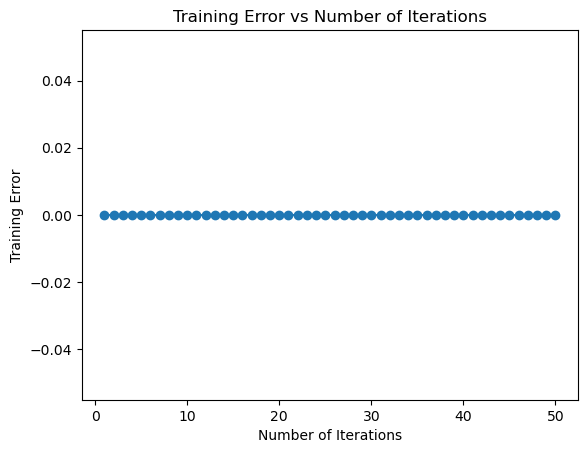

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class AdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, weak_learner, n_estimators=50):
        self.weak_learner = weak_learner
        self.n_estimators = n_estimators

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alphas_ = np.zeros(self.n_estimators)
        self.estimators_ = []
        self.errors_ = []

        # Initialize weights
        self.weights_ = np.ones(n_samples) / n_samples
        
        for t in range(self.n_estimators):
            # Create a new weak learner with the current weights
            weak_model = self.weak_learner()
            weak_model.fit(X, y, sample_weight=self.weights_)
            y_pred = weak_model.predict(X)
            
            # Calculate the error
            error = np.sum(self.weights_ * (y_pred != y)) / np.sum(self.weights_)
            self.errors_.append(error)
            
            # Avoid division by zero and update alpha
            if error == 0:
                alpha = 1.0
            else:
                alpha = 0.5 * np.log((1 - error) / error)
            
            self.alphas_[t] = alpha
            self.estimators_.append(weak_model)
            
            # Update weights
            self.weights_ *= np.exp(alpha * (y_pred != y))
            self.weights_ /= np.sum(self.weights_)
        
        return self

    def predict(self, X):
        # Compute the weighted vote
        pred = np.zeros(X.shape[0])
        for alpha, estimator in zip(self.alphas_, self.estimators_):
            pred += alpha * estimator.predict(X)
        return np.sign(pred)

    def plot_errors(self):
        plt.plot(range(1, self.n_estimators + 1), self.errors_, marker='o')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Training Error')
        plt.title('Training Error vs Number of Iterations')
        plt.show()

# Create synthetic data
X, y = make_classification(n_samples=500, n_features=20, n_informative=15, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train AdaBoost model
ada = AdaBoostClassifier(weak_learner=DecisionTreeClassifier, n_estimators=50)
ada.fit(X_train, y_train)

# Plot the training error
ada.plot_errors()


### Algorithm 6.7 Gentle AdaBoost [100]

1. **Input**: 
   \[
   w_i = \frac{1}{N}, \, i = 1, \ldots, N, \quad F(x) = 0
   \]

2. **For** \( m = 1 \) **to** \( M \) **do**:
   \[
   \text{Fit the regression function } f_m(x) \text{ by weighted least squares of } y_i \text{ to } x_i \text{ with weights } w_i.
   \]
   
   \[
   \text{Update } F(x) \leftarrow F(x) + f_m(x).
   \]
   
   \[
   \text{Update } w_i \leftarrow w_i \exp\left(-y_i f_m(x_i)\right) \text{ and renormalize}.
   \]

3. **End for**

4. **Output**: 
   \[
   \text{The classifier } \text{sign}\left[F(x)\right] = \text{sign}\left[\sum_{m=1}^M f_m(x)\right]
   \]


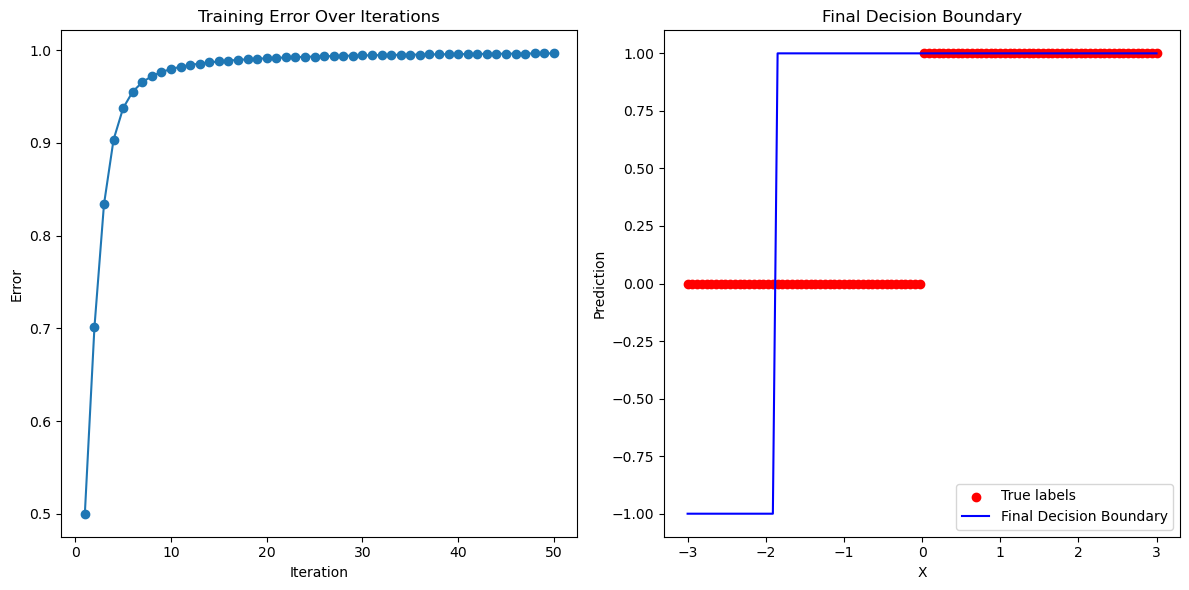

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(0)
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = (X > 0).astype(int).ravel()  # Binary classification

# Gentle AdaBoost Implementation
def gentle_adaboost(X, y, M):
    N = len(y)
    weights = np.ones(N) / N
    F = np.zeros(N)
    errors = []
    
    for m in range(M):
        # Fit regression model with weighted least squares
        model = LinearRegression()
        model.fit(X, y, sample_weight=weights)
        fm = model.predict(X)
        
        # Update F(x)
        F += fm
        
        # Update weights
        predictions = np.sign(F)
        misclassified = (y != predictions).astype(int)
        error = np.sum(weights * misclassified) / np.sum(weights)
        errors.append(error)
        
        # Update weights and renormalize
        weights *= np.exp(-y * fm)
        weights /= np.sum(weights)
    
    return F, errors

# Parameters
M = 50  # Number of iterations

# Train Gentle AdaBoost model
F, errors = gentle_adaboost(X, y, M)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the training error over iterations
plt.subplot(1, 2, 1)
plt.plot(range(1, M+1), errors, marker='o')
plt.title('Training Error Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Plot the final decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X, y, c='red', label='True labels')
plt.plot(X, np.sign(F), color='blue', label='Final Decision Boundary')
plt.title('Final Decision Boundary')
plt.xlabel('X')
plt.ylabel('Prediction')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import random
import math

# Generate synthetic data
def generate_data(N):
    X = [i / 10.0 - 3 for i in range(N)]  # Values from -3.0 to 3.0
    y = [1 if x > 0 else -1 for x in X]  # Binary labels based on the sign of x
    return X, y

# Fit weighted least squares regression (simple version)
def weighted_least_squares(X, y, weights):
    X_mean = sum(x * w for x, w in zip(X, weights)) / sum(weights)
    y_mean = sum(y_i * w for y_i, w in zip(y, weights)) / sum(weights)
    numerator = sum((x - X_mean) * (y_i - y_mean) * w for x, y_i, w in zip(X, y, weights))
    denominator = sum((x - X_mean) ** 2 * w for x, w in zip(X, weights))
    if denominator == 0:
        return 0
    return numerator / denominator

# Gentle AdaBoost Implementation
def gentle_adaboost(X, y, M):
    N = len(y)
    weights = [1.0 / N] * N
    F = [0] * N
    errors = []

    for _ in range(M):
        # Fit regression model with weighted least squares
        fm = weighted_least_squares(X, y, weights)
        
        # Update F(x)
        F = [F_i + fm for F_i in F]

        # Calculate errors
        predictions = [1 if f > 0 else -1 for f in F]
        error = sum(w * (yi != pred) for w, yi, pred in zip(weights, y, predictions)) / sum(weights)
        errors.append(error)

        # Update weights and renormalize
        weights = [w * math.exp(-yi * fm) for w, yi in zip(weights, y)]
        weight_sum = sum(weights)
        if weight_sum != 0:
            weights = [w / weight_sum for w in weights]

    return F, errors

# Plotting the results using simple text-based output
def plot_results(X, y, F, errors, M):
    # Plot training error
    print("Training Error Over Iterations:")
    for i, error in enumerate(errors):
        print(f"Iteration {i + 1}: Error = {error:.4f}")

    # Plot final decision boundary
    print("\nFinal Decision Boundary:")
    step = (max(X) - min(X)) / 50
    x_range = [min(X) + i * step for i in range(51)]
    decision_boundary = [1 if f > 0 else -1 for f in F]

    for x in x_range:
        y_pred = 1 if sum(1 if xi > 0 else -1 for xi in X) > 0 else -1
        print(f"x = {x:.1f}, Prediction = {y_pred}")

# Parameters
N = 100
M = 50

# Generate and process data
X, y = generate_data(N)
F, errors = gentle_adaboost(X, y, M)

# Display results
plot_results(X, y, F, errors, M)


Training Error Over Iterations:
Iteration 1: Error = 0.3100
Iteration 2: Error = 0.4288
Iteration 3: Error = 0.5681
Iteration 4: Error = 0.7038
Iteration 5: Error = 0.8123
Iteration 6: Error = 0.8861
Iteration 7: Error = 0.9308
Iteration 8: Error = 0.9564
Iteration 9: Error = 0.9710
Iteration 10: Error = 0.9794
Iteration 11: Error = 0.9846
Iteration 12: Error = 0.9879
Iteration 13: Error = 0.9902
Iteration 14: Error = 0.9918
Iteration 15: Error = 0.9930
Iteration 16: Error = 0.9939
Iteration 17: Error = 0.9946
Iteration 18: Error = 0.9952
Iteration 19: Error = 0.9957
Iteration 20: Error = 0.9960
Iteration 21: Error = 0.9964
Iteration 22: Error = 0.9966
Iteration 23: Error = 0.9969
Iteration 24: Error = 0.9971
Iteration 25: Error = 0.9973
Iteration 26: Error = 0.9974
Iteration 27: Error = 0.9976
Iteration 28: Error = 0.9977
Iteration 29: Error = 0.9978
Iteration 30: Error = 0.9979
Iteration 31: Error = 0.9980
Iteration 32: Error = 0.9981
Iteration 33: Error = 0.9982
Iteration 34: Error 

## Learning Machine

Consider a learning machine whose task is to learn a mapping $ x_i \rightarrow y_i $. The machine is defined by a set of possible mappings $ x \rightarrow f(x, \alpha) $, with the functions $ f(x, \alpha) $ labeled by the adjustable parameter vector $\alpha$.

The machine is usually assumed to be deterministic: for a given input vector \( x \) and choice of $ \alpha $, it will always give the same output $ f(x, \alpha) $. A particular choice of $ \alpha $ generates a "trained machine," and thus a neural network with fixed architecture, where $ \alpha $ corresponds to the weights and biases, is called a learning machine in this sense.

The expectation of the test error for a trained machine is defined as:

$$
R(\alpha) = \frac{1}{2} \int |y - f(x, \alpha)| \, dP(x, y),
$$

where \( P(x, y) \) is some unknown cumulative probability distribution from which the data \( x \) and \( y \) are drawn, i.e., the data are assumed to be independently and identically distributed (i.i.d.). When a density for the cumulative probability distribution \( P(x, y) \) exists, \( dP(x, y) \) may be written as \( p(x, y) \, dx \, dy \).

The quantity $ R(\alpha) $ is called the **expected risk**, or just the **risk** for a choice of $ \alpha $. The **empirical risk** $ R_{\text{emp}}(\alpha) $ is defined to be the measured mean error rate on the given training set:

$$
R_{\text{emp}}(\alpha) = \frac{1}{2N} \sum_{i=1}^{N} |y_i - f(x_i, \alpha)|,
$$

where no probability distribution appears.

The quantity $ \frac{1}{2} |y_i - f(x_i, \alpha)| $ is called the **loss**.  
$$
R_{\text{emp}}(\alpha) = \frac{1}{2N} \sum_{i=1}^{N} |y_i - f(x_i, \alpha)|,
$$
 and a particular training set $ \{x_i, y_i\} $.

Another name for a family of functions $ f(x, \alpha) $ is "learning machine." Designing a good learning machine depends on the choice of $ \alpha $. A popular method for building $ \alpha $ is **empirical risk minimization (ERM)**. By ERM, we mean $ R_{\text{emp}}(\alpha) $ is minimized over all possible choices of $ \alpha $, resulting in a risk $ R(\alpha^*) $ that is close to its minimum.

The minimization of different loss functions results in different machine learning methods. In reality, most machine learning methods should have three phases rather than two: training, validation, and testing. After the training is complete, there may be several models (e.g., artificial neural networks) available, and one needs to decide which one provides a good estimation of the error it will achieve on a test set.

For this purpose, there should be a third separate data set: the **validation set**.

## Machine Learning Methods

The following section will introduce various machine learning methods based on the minimization of different loss functions.


## Machine Learning Methods

There are many different machine learning methods for modeling data to solve underlying problems. These methods can be divided into the following types \([38]\):

### 1. Machine Learning Methods Based on Network Structure

- **Artificial Neural Networks (ANNs):** 
  ANNs are inspired by the brain and are composed of interconnected artificial neurons capable of performing computations on their inputs \([120]\). The input data activate the neurons in the first layer of the network, and the output of this layer is passed to the next layer of neurons. Similarly, each layer's output serves as the input for the subsequent layer, with the final output layer producing the result. Layers between the input and output are referred to as hidden layers. When used as a classifier, the output layer of an ANN generates the final classification category.

- **Bayesian Networks:** 
  A Bayesian network is a probabilistic graphical model that represents variables and the relationships between them \([98, 120, 130]\). The network is constructed with nodes representing discrete or continuous random variables and directed edges showing the relationships, forming a directed acyclic graph. Each node maintains the states of the random variable and the conditional probability distribution. Bayesian networks can be constructed using expert knowledge or algorithms that perform inference.

### 2. Learning Methods Based on Statistical Analysis

- **Association Rules:**
  Association rule mining was popularized by Agrawal et al. in 1993 \([3]\). Its goal is to discover unknown association rules from data. An association rule describes a relationship \( X \Rightarrow Y \) between an itemset \( X \) and an item \( Y \). The two main metrics for evaluating an association rule are **support**, which indicates how frequently the itemset appears in the dataset, and **confidence**, which indicates how often the rule has been found to be true.

- **Clustering:**
  Clustering \([126]\) refers to a set of techniques for identifying patterns in high-dimensional unlabeled data. It is an unsupervised pattern discovery method that groups data based on a similarity measure.

- **Ensemble Learning:**
  Supervised learning algorithms generally search the hypothesis space to determine the best hypothesis for a problem. Ensemble learning combines multiple learning algorithms to achieve better predictive performance than individual algorithms. Ensemble methods often use multiple weak learners to build a strong learner \([206]\).

- **Hidden Markov Models (HMMs):**
  HMMs are statistical Markov models where the system being modeled is assumed to be a Markov process with hidden (unobservable) states \([17]\). The challenge is to determine hidden parameters from observable parameters. States in an HMM represent unobservable conditions being modeled. By associating different output probability distributions with each state and allowing state transitions over time, HMMs can represent non-stationary sequences.

- **Inductive Learning:**
  Deduction and induction are two fundamental techniques for inferring information from data. Inductive learning refers to traditional supervised learning, where a model is learned from labeled examples and used to predict the labels of new examples. The process involves identifying patterns from observations, formulating hypotheses, and drawing general conclusions or theories. Several machine learning algorithms are inductive, with notable examples being the "Repeated Incremental Pruning to Produce Error Reduction" (RIPPER) algorithm \([57]\) and the quasi-optimal (AQ) algorithm \([177]\).

- **Naive Bayes:**
  The Naive Bayes classifier \([98]\) is a simple yet competitive Bayesian classifier that assumes strong independence among features. Although the independence assumption rarely holds in practice, Naive Bayes can handle an arbitrary number of independent features (whether continuous or categorical) by reducing high-dimensional density estimation to a one-dimensional task. Despite its limitations, the Naive Bayes classifier is optimal if features are conditionally independent given the class. Its main advantage is that it is an online algorithm, meaning its training can be completed in linear time \([98, 270]\).


## Expected Performance of Machine Learning Algorithms

A machine learning algorithm is expected to have the following performance metrics \([145]\):

- **Scalability:** 
  This parameter can be defined as the ability of an algorithm to handle increases in scale, such as feeding more data to the system, adding more features to the input data, or adding more layers to a neural network, without endlessly increasing its complexity \([5]\).

- **Training Time:** 
  This refers to the amount of time a machine learning algorithm takes to be fully trained and gain the ability to make predictions.

- **Response Time:** 
  Related to the agility of the machine learning system, this parameter represents the time an algorithm takes, after being trained, to make a prediction for the desired self-organizing networks (SON) function.

- **Training Data:** 
  This metric represents the amount and type of training data an algorithm needs. Algorithms that have access to more training data usually show better accuracy but take more time to be trained.

- **Complexity:** 
  The complexity of a system can be defined as the number of mathematical operations it performs to achieve the desired solution. This parameter helps determine if certain algorithms are suitable for deployment at the user end.

- **Accuracy:** 
  Future networks are expected to be more intelligent and faster, enabling different types of applications and user requirements. Deploying algorithms with high accuracy is critical for guaranteeing the operability of certain self-organizing network functions.

- **Convergence Time:** 
  This metric, distinct from response time, relates to how fast the algorithm reaches an agreement that the found solution is optimal for that particular problem at the time.

- **Convergence Reliability:** 
  This parameter represents the susceptibility of an algorithm to get stuck at local minima and how initial conditions can affect its performance.


## Classification and Regression

In essence, machine learning is about learning from the given training samples to solve one of two basic problems: **regression** (for continuous outputs) or **classification** (for discrete outputs). Classification is closely related to pattern recognition, with its goal being to design a classifier by learning a "training" set of input data to recognize or classify unknown samples. Regression refers to designing a regressor or predictor based on machine learning results from a set of training data to make predictions for unknown continuous samples.

### 6.6.1 Pattern Recognition and Classification

**Pattern recognition** is the field devoted to the study of methods designed to categorize data into distinct classes. According to Watanabe [262], a pattern is defined as "an opposite of chaos; it is an entity, vaguely defined, that could be given a name."

Pattern recognition is widely applied in recognizing human biometrics (such as a person's face, fingerprint, iris) and various targets (such as aircraft, ships). In these applications, the extraction of object features is crucial. For example, when a target is considered as a linear system, the target parameter is a feature of the target signal.

Given a pattern, its recognition/classification may consist of one of the following two tasks [262]:

- **Supervised classification** (e.g., discriminant analysis), in which the input pattern is identified as a member of a predefined class.
- **Unsupervised classification** (e.g., clustering), in which the pattern is assigned to a previously unknown class.

The tasks of pattern recognition/classification are customarily divided into four distinct blocks:

1. Data representation (acquisition and pre-processing).
2. Feature selection or extraction.
3. Clustering.
4. Classification.

The four best-known approaches for pattern recognition are [128]:

1. Template matching.
2. Statistical classification.
3. Syntactic or structural matching.
4. Neural networks.

### Data Representation

Data representation is mostly problem-specific. In matrix algebra, signal processing, pattern recognition, etc., data pre-processing most commonly involves zero-mean normalization (i.e., data centering):

$$
x^{\text{cent}}_{i,j} = x_{i,j} - \bar{x}, \quad \bar{x} = \frac{1}{N} \sum_{j=1}^{N} x_{i,j}, \quad i = 1, \dots, N
$$

*(6.6.1)*

This process removes the useless direct current (DC) components in data, where \( x_{i,j} \) is the \( j \)-th entry of the vector \( x_i \). The data centering is also referred to as data zero-meaning.

To prevent drastic changes in data amplitude, the input data are also required to be scaled to similar ranges:

$$
x^{\text{scal}}_{i,j} = \frac{2x_{i,j}}{s_i}, \quad s_i = \sum_{k=1}^{n} x_{k}, \quad i = 1, \dots, N; \, j = 1, \dots, n
$$

*(6.6.2)*

This pre-processing is called data scaling.


## Feature Selection

In many applications, data vectors must become low-dimensional vectors via some transformation/processing method. These low-dimensional vectors are called **pattern vectors** or **feature vectors** because they extract the features of the original data vectors and are directly used for pattern clustering and classification. For example, colors of clouds and parameters of voice tones are pattern or feature vectors in weather forecasting and voice classification, respectively.

Due to high dimensionality, the original data vectors are not directly available for pattern recognition. Therefore, one should try to find invariant features in data that describe the differences between classes as best as possible.

According to the given training set, feature selection can be divided into **supervised** and **unsupervised** methods.

- **Supervised feature selection**: Let $ X_l = \{(x_1 , y_1), \dots, (x_N , y_N)\} $ be the labeled set of data, where $ x_i \in \mathbb{R}^n $ is the \(i\)-th data vector and $ y_i = k $ indicates the \(k\)-th class to which the data vector $ x_i $ belongs, where $ k \in \{1, \dots, M\} $ is the label of \(M\) target classes. The pattern recognition uses supervised machine learning. Let $ l_p $ be the number of $ k = p $ and $ l_1 + \dots + l_M = M $, we can construct the data matrix in the \( p \)-th class of targets:

$$
x^{(p)} = \begin{pmatrix}
x_1^{(p)}, \dots, x_{l_p}^{(p)}
\end{pmatrix}^T \in \mathbb{R}^{N \times l_p}, \quad p = 1, \dots, M.
$$
*1.1*

Thus, we can select feature vectors in data by using matrix algebra methods such as **principal component analysis** (PCA), etc. This selection, as a supervised machine learning technique, is also known as **feature selection** or **dimensionality reduction** since the dimension of the feature vector is much less than the dimension of the original data vectors.

- **Unsupervised feature selection**: When data are unlabeled, i.e., only data vectors \( x_1, \dots, x_N \) are given, the pattern recognition is **unsupervised machine learning**, which is more challenging than supervised pattern recognition. In this case, we need to use mapping or signal processing methods for transforming the data into invariant features such as **short-time Fourier transform**, **bispectrum**, **wavelet**, etc.

Feature selection aims to select the most significant features of the data and reduce the dimensionality (i.e., the number of features) for the remaining steps of the task. We will discuss supervised and unsupervised feature extractions in detail later.

## Clustering

Let \( w \) be the weight vector of a cluster, which aims at making patterns within a cluster more similar to each other than patterns belonging to other clusters. Clustering methods are used to find the actual mapping between patterns and labels (or targets).

This categorization has two machine learning methods: **supervised learning** (which makes distinct labeling of the data) and **unsupervised learning** (division of the data into classes), or a combination of more than one of these tasks.

The above three stages (data representation, feature selection, and clustering) belong to the **training phase**. After forming such a cluster, one may perform classification in the next **testing phase**.

## Classification

Classification is one of the most frequently encountered decision-making tasks in human activity. A classification problem arises when an object needs to be assigned to a predefined group or class based on a set of observed attributes. After clustering a number of groups or classes, one decides which class a given testing sample belongs to. This step is called the **testing phase**, compared to the previous training stage. Clearly, this is a form of supervised learning.


## Regression

In statistical modeling and machine learning, **regression** is used to fit a statistical process for estimating the relationships among variables. It focuses on the relationship between a dependent variable \(x\) and one or more independent variables (named as "predictors") $\beta$. More specifically, regression analyzes how the typical value of the dependent variable changes when any one of the independent variables is varied, while the other independent variables are held fixed.

Machine learning is widely used for prediction and forecasting, where its use has substantial overlap with the field of statistical regression analysis.

Consider the more general multiple regression model with \(p\) independent variables:

$$
y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i,
$$
*1*

where $x_{ij}$ is the \(i\)-th observation on the \(j\)-th independent variable $x_j = [x_{1j}, \dots, x_{pj}]^T$. If the first independent variable takes the value 1 for all \(i\), then $x_{i1} = 1$.


Then the regression model reduces to:

$$
y_i = \beta_1 + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i
$$

and $\beta_1$ is called the **regression intercept**.

The regression residual is defined as:

$$
\epsilon_i = y_i - \hat{\beta}_1 x_{i1} - \dots - \hat{\beta}_p x_{ip}.
$$
*1.2*

Hence, the normal equations on regression are given by:

$$
\sum_{i=1}^{n} \sum_{k=1}^{p} x_{ij} x_{ik} \hat{\beta}_k = \sum_{i=1}^{n} x_{ij} y_i, \quad j = 1, \dots, p.
$$
*1.3*

In matrix notation, the above normal equations can be written as:

$$
(X^T X) \hat{\beta} = X^T y,
$$
*1.4*

where $X = [x_{ij}]_{i=1,j=1}^{n,p}$ is an $n \times p$ matrix, $y = [y_i]_{i=1}^{n}$ is an $n \times 1$ vector, and $\hat{\beta} = [\hat{\beta}_j]_{j=1}^{p}$ is a $p \times 1$ vector.

Finally, the solution of the regression problem is given by:

$$
\hat{\beta} = (X^T X)^{-1} X^T y.
$$
*1.5*


In [1]:
# Linear Regression using the Normal Equation
# No external libraries used (like NumPy or SciPy)

# Matrix transpose function
def transpose(X):
    return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]

# Matrix multiplication function
def matmul(A, B):
    # Dimensions of the resulting matrix
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    # Perform matrix multiplication
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Function to calculate the inverse of a 2x2 matrix (for simplicity)
def inverse_2x2(matrix):
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    det = a * d - b * c
    if det == 0:
        raise ValueError("Matrix is not invertible")
    return [[d / det, -b / det], [-c / det, a / det]]

# Linear regression using the Normal Equation
def linear_regression(X, y):
    # Add intercept term (1s) to X
    X_with_intercept = [[1] + row for row in X]
    
    # Compute transpose of X
    X_transpose = transpose(X_with_intercept)
    
    # Compute X^T * X
    XTX = matmul(X_transpose, X_with_intercept)
    
    # Compute (X^T * X)^(-1) (assuming a 2x2 matrix for simplicity)
    XTX_inv = inverse_2x2(XTX)
    
    # Compute X^T * y
    XTy = matmul(X_transpose, [[yi] for yi in y])
    
    # Compute the final coefficients: beta = (X^T * X)^(-1) * X^T * y
    beta = matmul(XTX_inv, XTy)
    
    return beta

# Example usage
if __name__ == "__main__":
    # Training data (X values and corresponding y values)
    X = [[1], [2], [3], [4]]  # Independent variable (feature)
    y = [2, 4, 6, 8]         # Dependent variable (target)

    # Perform linear regression
    coefficients = linear_regression(X, y)
    
    # Output the result
    print("Intercept:", coefficients[0][0])
    print("Slope:", coefficients[1][0])


Intercept: 0.0
Slope: 2.0


Intercept (β0): 0.4443021548944591
Slope (β1): 2.487387004280408


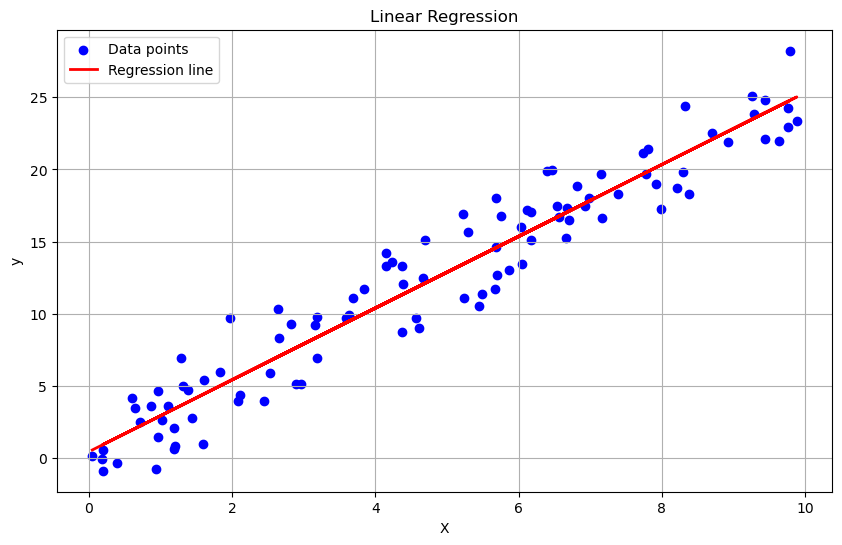

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 data points, scaled by 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # y = 2.5 * X + noise

# Add a column of ones to include the intercept term in X
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

# Compute the optimal parameters using the normal equation
X_b_T = X_b.T
theta_best = np.linalg.inv(X_b_T @ X_b) @ X_b_T @ y

# Print the coefficients
print(f"Intercept (β0): {theta_best[0][0]}")
print(f"Slope (β1): {theta_best[1][0]}")

# Predict y using the learned parameters
y_pred = X_b @ theta_best

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


### Feature Selection

The performance of machine learning methods generally depends on the choice of data representation. The representation choice heavily depends on representation learning. Representation learning is also known as feature learning.

In machine learning, representation learning \cite{22} is a set of learning techniques that allows a system to automatically discover the representations needed for feature detection or classification from raw data.

When mining large data sets, both in dimension and size, we are given a set of original variables (e.g., in gene expression) or a set of extracted features (such as pre-processing via principal or minor component analysis) in data representation. An important problem is how to select a subset of the original variables or a subset of the original features. The former is called the variable selection, and the latter is known as the feature selection or representation choice.

Feature selection is a fundamental research topic in data mining and machine learning with a long history since the 1970s. With the advance of science and technology, more and more real-world data sets in data mining and machine learning often involve a large number of features. But, not all features are essential since many of them are redundant or even irrelevant, which may significantly degrade the accuracy of learned models as well as reduce the learning speed and ability of the models. By removing irrelevant and redundant features, feature selection can reduce the dimensionality of the data, speed up the learning process, simplify the learned model, and/or improve the performance \cite{69, 112, 284}.

A smaller set of representative variables or features, retaining the optimal salient characteristics of the data, not only decreases the processing complexity and time, but also overcomes the risk of “overfitting” and leads to more compactness of the model learned and better generalization. When the class labels of the data are given, we are faced with supervised variable or feature selection; otherwise, we should use unsupervised variable or feature selection.

Since the learning methods used in both the variable selection and the feature selection are essentially the same, we take the feature selection as the subject of this section.


### Supervised Feature Selection

An important problem in machine learning is to reduce the dimensionality \( D \) of the feature space \( F \) to overcome the risk of “overfitting.” Data overfitting arises when the number \( n \) of features is large and the number \( m \) of training patterns is comparatively small. In such a situation, one may easily find a decision function that separates the training data but gives a poor result for test data.

Feature selection has become the focus of much research in areas of application (e.g., text processing of internet documents, gene expression array analysis, and combinatorial chemistry) for high-dimensional data. The objective of feature selection is three-fold \cite{112}:

1. Improving the prediction performance of the predictors.
2. Providing faster and more cost-effective predictors.
3. Providing a better understanding of the underlying process that generated the data.

Many feature selection algorithms are based on variable ranking. As a pre-processing step of feature selection, variable ranking is a filter method: it is independent of the choice of the predictor. For example, in the gene selection problem, the variables are gene expression coefficients corresponding to the abundance of mRNA in a sample for a number of patients. A typical classification task is to separate healthy patients from cancer patients, based on their gene expression “profile” \cite{112}.

The feature selection methods can be divided into two categories: the exhaustive enumeration method and the greedy method.

- **Exhaustive Enumeration Method**: Selects the best subset of features satisfying a given “model selection” criterion by exhaustive enumeration of all subsets of features. However, this method is impractical for large numbers of features.

- **Greedy Method**: Available particularly for feature selection in large dimensional input spaces. Among various possible methods, feature ranking techniques are very attractive. A number of top-ranked features may be selected for further analysis or to design a classifier. Alternatively, a threshold can be set on the ranking criterion. Only the features whose criterion exceeds the threshold are retained.

Consider a set of \( m \) examples $ \{x_k, y_k\} $ ($ k = 1, \ldots, m $), where \( x_k = [x_{k,1}, \ldots, x_{k,n}]^T \) and one output variable \( y_k \). Let \( \bar{x}_i = \frac{1}{m} \sum_{k=1}^m x_{k,i} \) and \( \bar{y} = \frac{1}{m} \sum_{k=1}^m y_k \) stand for the averages over the index \( k \). Variable ranking makes use of a scoring function \( S(i) \) computed from the values \( x_{k,i} \) and \( y_k \), \( k = 1, \ldots, m \). By convention, a high score is indicative of a valuable variable (e.g., gene) and variables are sorted in decreasing order of \( S(i) \).

A good feature selection method selects first a few features that individually classify best the training data, and then increases the number of features. Classical feature selection methods include correlation methods and expression ratio methods.

A typical correlation method is based on the Pearson correlation coefficients defined as

$$
R(i) = \frac{\sum_{k=1}^m (x_{k,i} - \bar{x}_i)(y_k - \bar{y})}{\sqrt{\sum_{k=1}^m (x_{k,i} - \bar{x}_i)^2} \sqrt{\sum_{k=1}^m (y_k - \bar{y})^2}}
$$

where the numerator denotes the between-class variance and the denominator represents the within-class variance. In linear regression, using the square of \( R(i) \) as a variable ranking criterion enforces a ranking according to the goodness of linear fit of individual variables.

For two-class data \( \{x_k, y_k\} \) (\( k = 1, \ldots, m \)), where \( x_k = [x_{k,1}, \ldots, x_{k,n}]^T \) consists of \( n \) input variables \( x_{k,i} \) (\( i = 1, \ldots, n \)) and \( y_k \in \{+1, -1\} \) (e.g., certain disease vs. normal), let

$$
\mu_i^+ = \frac{1}{m^+} \sum_{k=1}^{m^+} x_{k,i}
$$

$$
\mu_i^- = \frac{1}{m^-} \sum_{k=1}^{m^-} x_{k,i}
$$

$$
\sigma_i^+ = \sqrt{\frac{1}{m^+} \sum_{k=1}^{m^+} (x_{k,i} - \mu_i^+)^2}
$$

$$
\sigma_i^- = \sqrt{\frac{1}{m^-} \sum_{k=1}^{m^-} (x_{k,i} - \mu_i^-)^2}
$$

where \( m^+ \) and \( m^- \) are the numbers of the \( i \)-th variable \( x_{k,i} \) corresponding to \( y_i = +1 \) and \( y_i = -1 \), respectively; \( \mu_i^+ \) and \( \mu_i^- \) are the means of \( x_{k,i} \) over the index \( k \) associated with \( y_i = +1 \) and \( y_i = -1 \), respectively; and \( \sigma_i^+ \) and \( \sigma_i^- \) are, respectively, the standard deviations of \( x_{k,i} \) over the index \( k \) associated with \( y_i = +1 \) and \( y_i = -1 \).

A well-known expression ratio method uses the ratio \cite{103, 109}:

$$
F(x_i) = \frac{|\mu_i^+ - \mu_i^-|}{\sigma_i^+ + \sigma_i^-}
$$

This method selects the highest ratios \( F(x_i) \) differing most on average in the two classes and having small deviations in the scores in the respective classes as top features. The expression ratio criterion is similar to Fisher’s discriminant criterion \cite{83}.

It should be noted that the variable dependencies cannot be ignored in feature selection as follows \cite{112}:

- Noise reduction and consequently better class separation may be obtained by adding variables that are presumably redundant.
- Perfectly correlated variables are truly redundant in the sense that no additional information is gained by adding them.
- Very high variable correlation (or anti-correlation) does not mean absence of variable complementarity.
- A variable that is completely useless by itself can provide a significant performance improvement when taken with others.
- Two variables that are useless by themselves can be useful together.

One possible use of feature ranking is the design of a class predictor (or classifier) based on a pre-selected subset of features. The weighted voting scheme yields a particular linear discriminant classifier:

$$
D(x) = \langle w, x - \mu \rangle = w^T (x - \mu)
$$

where

$$
\mu = \frac{1}{2} (\mu^+ + \mu^-)
$$

with

$$
\mu^+ = \frac{1}{n^+} \sum_{x_i \in X^+} x_i
$$

$$
\mu^- = \frac{1}{n^-} \sum_{x_i \in X^-} x_i
$$

where \( X^+ = \{(x_i, y_i = +1)\} \), \( X^- = \{(x_i, y_i = -1)\} \), and \( n^+ \) and \( n^- \) are the numbers of the training data vectors \( x_i \) belonging to the classes \( (+) \) and \( (-) \), respectively.

Define the \( n \times n \) within-class scatter matrix:

$$
S_w = \sum_{x_i \in X^+} (x_i - \mu^+)(x_i - \mu^+)^T + \sum_{x_i \in X^-} (x_i - \mu^-)(x_i - \mu^-)^T
$$

By Fisher’s linear discriminant, the classifier is given by \cite{113}:

$$
w = S_w^{-1} (\mu^+ - \mu^-)
$$

Once the classifier \( w \) is designed using the training data \( \{(x_i, y_i)\} \), \( i = 1, \ldots, n \) (\( y_i \in \{+1, -1\} \)), for any given data vector \( x \), the new pattern can be classified according to the sign of the decision function \cite{113}:

$$
D(x) = w^T x > 0 \Rightarrow x \in \text{class } (+)
$$

$$
D(x) = w^T x < 0 \Rightarrow x \in \text{class } (-)
$$

$$
D(x) = w^T x = 0 \text{ (decision boundary)}
$$


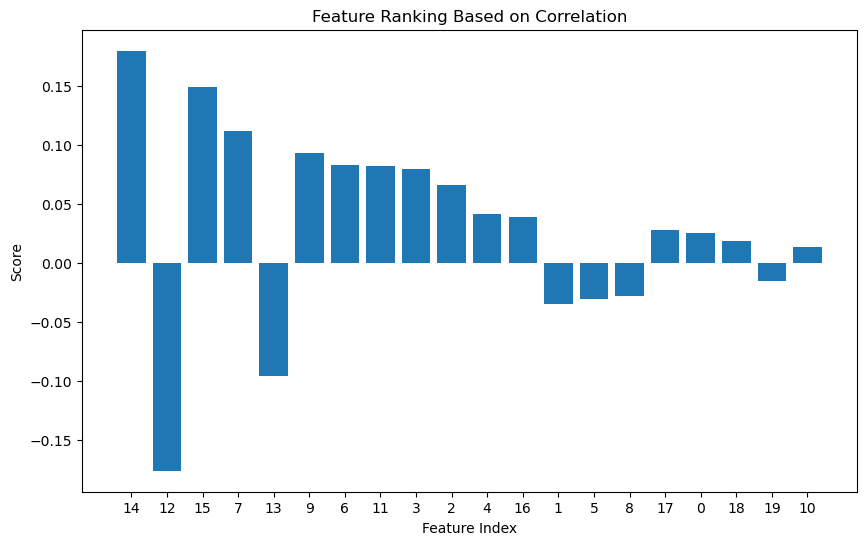

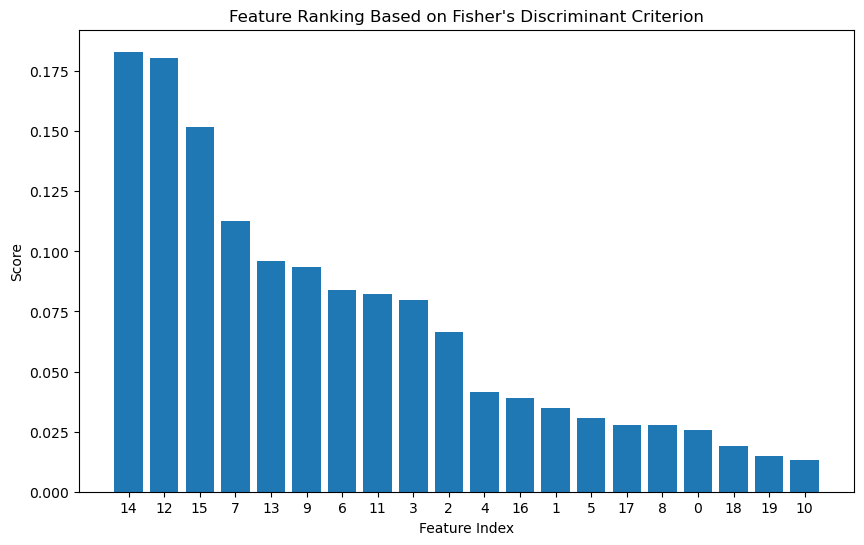

In [3]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_features = 20

# Random features
X = np.random.rand(n_samples, n_features)
# Random binary class labels
y = np.random.choice([1, -1], size=n_samples)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df['label'] = y
from scipy.stats import pearsonr

def compute_correlation(X, y):
    correlations = []
    for i in range(X.shape[1]):
        corr, _ = pearsonr(X[:, i], y)
        correlations.append(corr)
    return correlations

# Compute correlations
correlations = compute_correlation(X, y)

# Rank features by absolute correlation
feature_ranking = sorted(enumerate(correlations), key=lambda x: abs(x[1]), reverse=True)
def fisher_score(X, y):
    n_features = X.shape[1]
    scores = np.zeros(n_features)

    for i in range(n_features):
        feature = X[:, i]
        class1 = feature[y == 1]
        class2 = feature[y == -1]

        mu1, mu2 = np.mean(class1), np.mean(class2)
        sigma1, sigma2 = np.std(class1), np.std(class2)

        if sigma1 + sigma2 == 0:
            score = 0
        else:
            score = (np.abs(mu1 - mu2)) / (sigma1 + sigma2)
        
        scores[i] = score

    return scores

# Compute Fisher scores
fisher_scores = fisher_score(X, y)

# Rank features by Fisher scores
fisher_ranking = sorted(enumerate(fisher_scores), key=lambda x: x[1], reverse=True)
import matplotlib.pyplot as plt

def plot_feature_ranking(ranking, title):
    indices = [x[0] for x in ranking]
    scores = [x[1] for x in ranking]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(scores)), scores, tick_label=indices)
    plt.xlabel('Feature Index')
    plt.ylabel('Score')
    plt.title(title)
    plt.show()

# Plot correlation-based feature ranking
plot_feature_ranking(feature_ranking, 'Feature Ranking Based on Correlation')

# Plot Fisher’s discriminant criterion ranking
plot_feature_ranking(fisher_ranking, 'Feature Ranking Based on Fisher\'s Discriminant Criterion')


## Unsupervised Feature Selection

Consider the unsupervised feature selection for given data vectors $ \mathbf{x}_i $, $ i = 1, \ldots, n $ without labeled class indices $ y_i $, $ i = 1, \ldots, n $. In this case, there are two common similarity measures between two random vectors $ \mathbf{x} $ and $ \mathbf{y} $, as stated below.

### Correlation Coefficient

The correlation coefficient $ \rho(\mathbf{x}, \mathbf{y}) $ between two random vectors $ \mathbf{x} $ and $ \mathbf{y} $ is defined as

$$
\rho(\mathbf{x}, \mathbf{y}) = \frac{\text{cov}(\mathbf{x}, \mathbf{y})}{\sqrt{\text{var}(\mathbf{x}) \, \text{var}(\mathbf{y})}}
$$

where $ \text{var}(\mathbf{x}) $ denotes the variance of the random vector $ \mathbf{x} $ and $ \text{cov}(\mathbf{x}, \mathbf{y}) $ denotes the covariance between $ \mathbf{x} $ and $ \mathbf{y} $. The correlation coefficient has the following properties:

1. $ 0 \leq 1 - |\rho(\mathbf{x}, \mathbf{y})| \leq 1 $.
2. $ 1 - |\rho(\mathbf{x}, \mathbf{y})| = 0 $ if and only if $ \mathbf{x} $ and $ \mathbf{y} $ are linearly dependent.
3. Symmetric: $ 1 - |\rho(\mathbf{x}, \mathbf{y})| = 1 - |\rho(\mathbf{y}, \mathbf{x})| $.
4. Invariant to scaling and translation: If $ \mathbf{u} = \mathbf{x} - \mathbf{a} $ and $ \mathbf{v} = \mathbf{y} - \mathbf{b} $ for some constant vectors $ \mathbf{a} \), \( \mathbf{b} $ and constants $c $, $ d $, then $ 1 - |\rho(\mathbf{x}, \mathbf{y})| = 1 - |\rho(\mathbf{u}, \mathbf{v})| $.
5. Sensitive to rotation: If $ (\mathbf{u}, \mathbf{v}) $ is some rotation of $ (\mathbf{x}, \mathbf{y}) $, then $ |\rho(\mathbf{x}, \mathbf{y})| \neq |\rho(\mathbf{u}, \mathbf{v})| $.

### Least Squares Regression Error

Let \( \mathbf{y} = a + b\mathbf{x} \) be the linear regression of \( \mathbf{x} \) with the regression coefficients \( a \) and \( b \). The least squares regression error is defined as

$$
e^2(\mathbf{x}, \mathbf{y}) = \frac{1}{n} \sum_{i=1}^n \left(e(\mathbf{x}, \mathbf{y})_i \right)^2
$$

where

$$
e(\mathbf{x}, \mathbf{y})_i = \text{cov}(\mathbf{x}, \mathbf{y})_i - a - b\mathbf{x}_i
$$

The regression coefficients are given by

$$
a = \frac{1}{n} \sum_{i=1}^n \mathbf{y}_i, \quad b = \text{var}(\mathbf{x})
$$

and the mean square error \( e(\mathbf{x}, \mathbf{y}) \) is

$$
e(\mathbf{x}, \mathbf{y}) = \text{var}(\mathbf{y}) \left(1 - \rho(\mathbf{x}, \mathbf{y}) \right)^2
$$

If \( \mathbf{x} \) and \( \mathbf{y} \) are linearly correlated, then \( e(\mathbf{x}, \mathbf{y}) = 0 \), and if \( \mathbf{x} \) and \( \mathbf{y} \) are completely uncorrelated, then \( e(\mathbf{x}, \mathbf{y}) = \text{var}(\mathbf{y}) \). The measure \( e^2 \) is also called the residual variance. The least squares regression error measure has the following properties:

1. $ 0 \leq e(\mathbf{x}, \mathbf{y}) \leq \text{var}(\mathbf{y}) $.
2. $ e(\mathbf{x}, \mathbf{y}) = 0 $ if and only if $ \mathbf{x} $ and $ \mathbf{y} $ are linearly correlated.
3. Unsymmetric: $ e(\mathbf{x}, \mathbf{y}) \neq e(\mathbf{y}, \mathbf{x}) $.
4. Sensitive to scaling: If $ \mathbf{u} = \mathbf{x}/c $ and $ \mathbf{v} = \mathbf{y}/d $ for some constants $ c $ and $ d $, then $ e(\mathbf{x}, \mathbf{y}) = d e(\mathbf{u}, \mathbf{v}) $. However, $ e $ is invariant to translation of the variables.
5. The measure $ e $ is sensitive to the rotation of the scatter diagram in the $ \mathbf{x} \)-\( \mathbf{y} $ plane.

### Maximal Information Compression Index

To address the limitations of the above similarity measures, Mitra et al. proposed a maximal information compression index $ \lambda^2 $ defined as

$$
2\lambda^2(\mathbf{x}, \mathbf{y}) = \text{var}(\mathbf{x}) + \text{var}(\mathbf{y}) - \sqrt{\left(\text{var}(\mathbf{x}) + \text{var}(\mathbf{y})\right)^2 - 4\text{var}(\mathbf{x})\text{var}(\mathbf{y})(1 - \rho(\mathbf{x}, \mathbf{y})^2)}
$$

Here, $ \lambda^2(\mathbf{x}, \mathbf{y}) $ denotes the smallest eigenvalue of the covariance matrix of the random variables $ \mathbf{x} $ and $ \mathbf{y} $. The feature similarity measure $ \lambda^2(\mathbf{x}, \mathbf{y}) $ has the following properties:

1. $ 0 \leq \lambda^2(\mathbf{x}, \mathbf{y}) \leq 0.5(\text{var}(\mathbf{x}) + \text{var}(\mathbf{y})) $.
2. $ \lambda^2(\mathbf{x}, \mathbf{y}) = 0 $ if and only if $ \mathbf{x} $ and $ \mathbf{y} $ are linearly correlated.
3. Symmetric: $ \lambda^2(\mathbf{x}, \mathbf{y}) = \lambda^2(\mathbf{y}, \mathbf{x}) $.
4. Sensitive to scaling: If $ \mathbf{u} = \mathbf{x}/c \) and \( \mathbf{v} = \mathbf{y}/d $ for some nonzero constants \( c \) and \( d \), then $ \lambda^2(\mathbf{x}, \mathbf{y}) = \lambda^2(\mathbf{u}, \mathbf{v}) $. Since the expression of \( \lambda^2(\mathbf{x}, \mathbf{y}) \) does not contain the mean but only the variance and covariance terms, it is invariant to translation of \( \mathbf{x} \) and \( \mathbf{y} \).
5. \( \lambda^2 \) is invariant to rotation of the variables about the origin.

Let the original number of features be \( D \), and the original feature set be $ \mathcal{O} = \{ F_i, i = 1, \ldots, D \} $. Apply the measures of linear dependency, e.g., $ \rho(F_i, F_j) \), \( e(F_i, F_j) $, and/or $ \lambda^2(F_i, F_j) $ to compute the dissimilarity between $ F_i $ and $ F_j $, denoted by $ d(F_i, F_j) $. Smaller values of $ d(F_i, F_j) $ indicate higher similarity between features $ F_i $ and $ F_j $. Let $ r_{i,k} $ denote the dissimilarity between feature \( F_i \) and its nearest neighbor feature in $ \mathcal{R} $, and $ \inf_{F_i \in \mathcal{R}} r_{i,k} $ represent the infimum of $ r_{i,k} $ for $ F_i \in \mathcal{R} $.


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_features = 5
X = np.random.rand(n_samples, n_features)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate correlation coefficient
def correlation_coefficient(x, y):
    return np.corrcoef(x, y)[0, 1]

# Calculate least squares regression error
def least_squares_error(x, y):
    beta = np.linalg.lstsq(x[:, np.newaxis], y, rcond=None)[0]
    residuals = y - x * beta
    return np.mean(residuals**2)

# Calculate maximal information compression index (λ2)
def maximal_information_compression_index(x, y):
    var_x = np.var(x)
    var_y = np.var(y)
    cov_xy = np.cov(x, y)[0, 1]
    rho_xy = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
    term = (var_x + var_y)**2 - 4 * var_x * var_y * (1 - rho_xy**2)
    return np.sqrt(term) / 2

# Compute pairwise dissimilarities
def compute_dissimilarities(X):
    n_features = X.shape[1]
    dissimilarities = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            if i != j:
                x = X[:, i]
                y = X[:, j]
                dissimilarities[i, j] = maximal_information_compression_index(x, y)
                
    return dissimilarities

# Compute correlation coefficient matrix
correlation_matrix = np.corrcoef(X_scaled, rowvar=False)

# Compute least squares errors
least_squares_errors = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            least_squares_errors[i, j] = least_squares_error(X_scaled[:, i], X_scaled[:, j])

# Compute maximal information compression index
dissimilarity_matrix = compute_dissimilarities(X_scaled)

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(correlation_matrix, columns=[f'Feature {i}' for i in range(n_features)],
                              index=[f'Feature {i}' for i in range(n_features)])
least_squares_df = pd.DataFrame(least_squares_errors, columns=[f'Feature {i}' for i in range(n_features)],
                                index=[f'Feature {i}' for i in range(n_features)])
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, columns=[f'Feature {i}' for i in range(n_features)],
                                index=[f'Feature {i}' for i in range(n_features)])

print("Correlation Matrix:")
print(correlation_df)
print("\nLeast Squares Errors Matrix:")
print(least_squares_df)
print("\nMaximal Information Compression Index Matrix:")
print(dissimilarity_df)


Correlation Matrix:
           Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
Feature 0   1.000000  -0.021657   0.216800   0.026589   0.008466
Feature 1  -0.021657   1.000000   0.030113   0.159473   0.083599
Feature 2   0.216800   0.030113   1.000000   0.060483   0.151623
Feature 3   0.026589   0.159473   0.060483   1.000000   0.045550
Feature 4   0.008466   0.083599   0.151623   0.045550   1.000000

Least Squares Errors Matrix:
           Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
Feature 0   0.000000   0.999531   0.952998   0.999293   0.999928
Feature 1   0.999531   0.000000   0.999093   0.974568   0.993011
Feature 2   0.952998   0.999093   0.000000   0.996342   0.977011
Feature 3   0.999293   0.974568   0.996342   0.000000   0.997925
Feature 4   0.999928   0.993011   0.977011   0.997925   0.000000

Maximal Information Compression Index Matrix:
           Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
Feature 0   0.000000   0.021875   0.218990   0.026858   0.

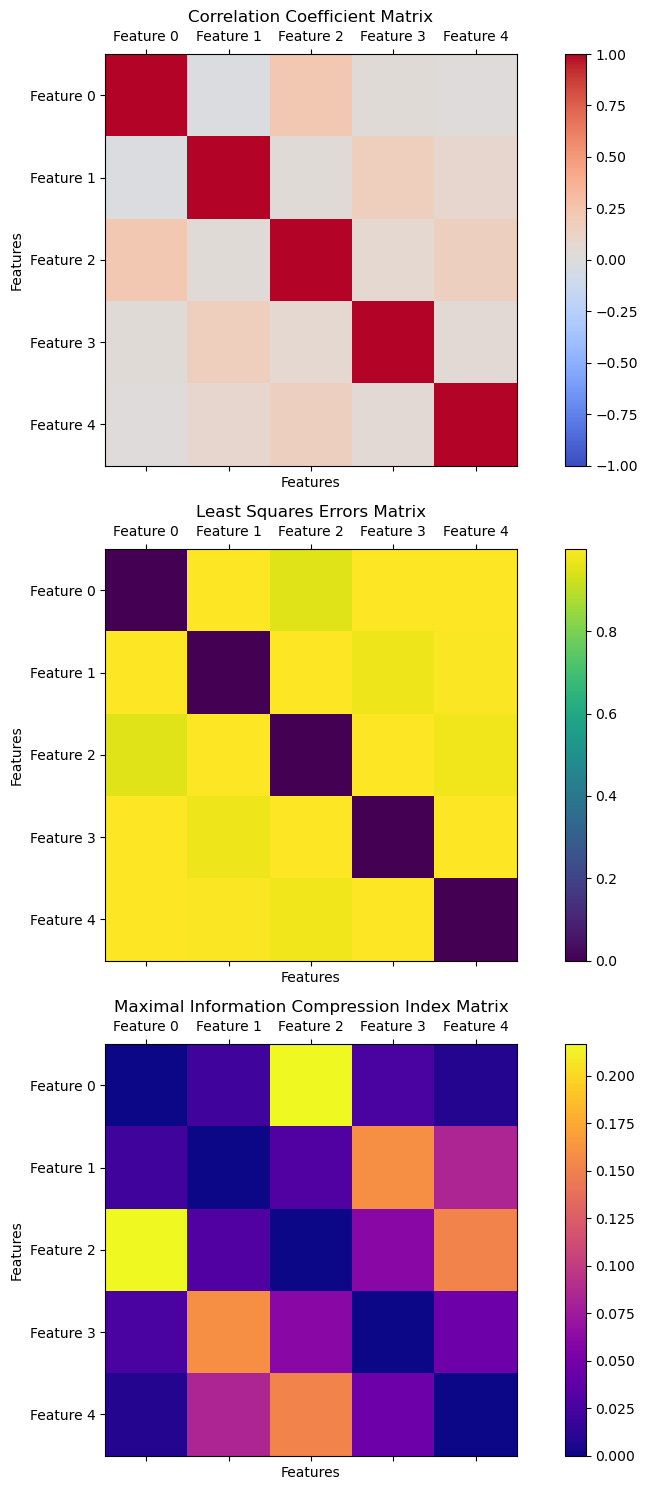

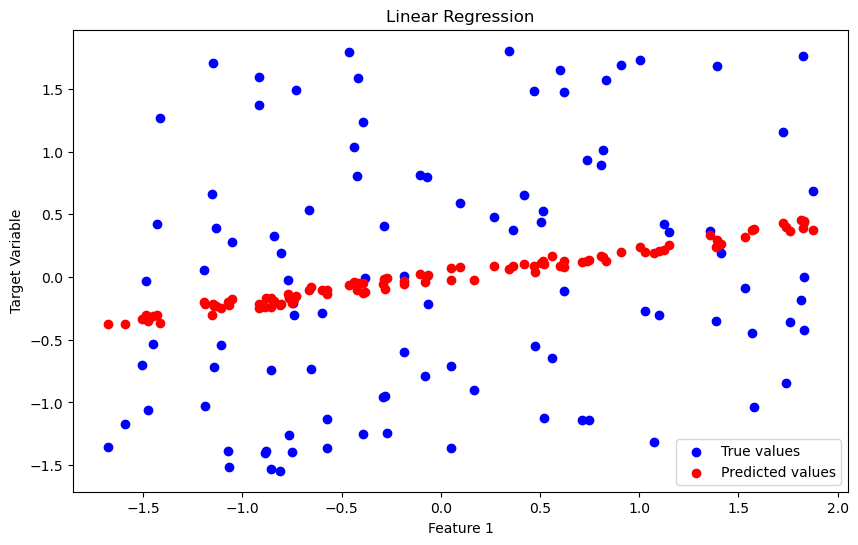

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_features = 5
X = np.random.rand(n_samples, n_features)

# Standardize features
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_scaled = standardize(X)

# Calculate correlation coefficient
def correlation_coefficient(x, y):
    return np.corrcoef(x, y)[0, 1]

# Calculate least squares regression error
def least_squares_error(x, y):
    beta = np.sum(x * y) / np.sum(x**2)
    residuals = y - x * beta
    return np.mean(residuals**2)

# Calculate maximal information compression index (λ2)
def maximal_information_compression_index(x, y):
    var_x = np.var(x)
    var_y = np.var(y)
    cov_xy = np.mean((x - np.mean(x)) * (y - np.mean(y)))
    rho_xy = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
    term = (var_x + var_y)**2 - 4 * var_x * var_y * (1 - rho_xy**2)
    return np.sqrt(term) / 2

# Compute pairwise dissimilarities
def compute_dissimilarities(X):
    n_features = X.shape[1]
    dissimilarities = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            if i != j:
                x = X[:, i]
                y = X[:, j]
                dissimilarities[i, j] = maximal_information_compression_index(x, y)
                
    return dissimilarities

# Compute correlation coefficient matrix
correlation_matrix = np.corrcoef(X_scaled, rowvar=False)

# Compute least squares errors
least_squares_errors = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            least_squares_errors[i, j] = least_squares_error(X_scaled[:, i], X_scaled[:, j])

# Compute maximal information compression index
dissimilarity_matrix = compute_dissimilarities(X_scaled)

# Plot results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Correlation Coefficient Matrix
cax = axs[0].matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, ax=axs[0])
axs[0].set_title('Correlation Coefficient Matrix')
axs[0].set_xticks(np.arange(n_features))
axs[0].set_yticks(np.arange(n_features))
axs[0].set_xticklabels([f'Feature {i}' for i in range(n_features)])
axs[0].set_yticklabels([f'Feature {i}' for i in range(n_features)])
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Features')

# Plot Least Squares Errors Matrix
cax = axs[1].matshow(least_squares_errors, cmap='viridis', vmin=0, vmax=np.max(least_squares_errors))
fig.colorbar(cax, ax=axs[1])
axs[1].set_title('Least Squares Errors Matrix')
axs[1].set_xticks(np.arange(n_features))
axs[1].set_yticks(np.arange(n_features))
axs[1].set_xticklabels([f'Feature {i}' for i in range(n_features)])
axs[1].set_yticklabels([f'Feature {i}' for i in range(n_features)])
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Features')

# Plot Maximal Information Compression Index Matrix
cax = axs[2].matshow(dissimilarity_matrix, cmap='plasma', vmin=0, vmax=np.max(dissimilarity_matrix))
fig.colorbar(cax, ax=axs[2])
axs[2].set_title('Maximal Information Compression Index Matrix')
axs[2].set_xticks(np.arange(n_features))
axs[2].set_yticks(np.arange(n_features))
axs[2].set_xticklabels([f'Feature {i}' for i in range(n_features)])
axs[2].set_yticklabels([f'Feature {i}' for i in range(n_features)])
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Features')

plt.tight_layout()
plt.show()

# Linear Regression for comparison
from sklearn.linear_model import LinearRegression

# Fit linear regression model
model = LinearRegression()
X_train = X_scaled[:, :2]  # Use first two features for simplicity
y_train = X_scaled[:, 2]   # Use third feature as target
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Plot regression
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', label='True values')
plt.scatter(X_train[:, 0], y_pred, color='red', label='Predicted values')
plt.title('Linear Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
plt.legend()
plt.show()
